###  We will begin by importing our data and the relevant modules that we will be making use of.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer as cv1
cv = cv1()
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
path = 'C:/Users/Yashwardhan Banta/Downloads/netflix_titles.csv'
df = pd.read_csv(path,header=0)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


##### We can see that the columns 'director','cast', 'country' ,'date_added' and 'rating' have missing values, of which we can fix the ratings.

In [5]:
df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [22]:
df['rating'] = df['rating'].fillna('TV-MA') #replacing NaN values with the mode of the categorical variable.

In [7]:
df.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6234
duration        6234
listed_in       6234
description     6234
dtype: int64

###### We will now observe the counts of the types.

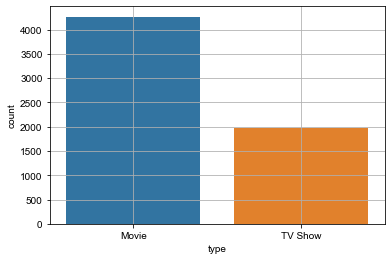

In [9]:
sns.countplot(df.type)
sns.set(style='darkgrid')
plt.grid()

###### Thus, the number of movies on netflix is almost twice that of the number of TV Shows, which means that either the users prefer to watch movies over TV shows, or that netflix hasn't released many TV Shows yet. There has, however, been a trend shift since 2018. We will look at it below.

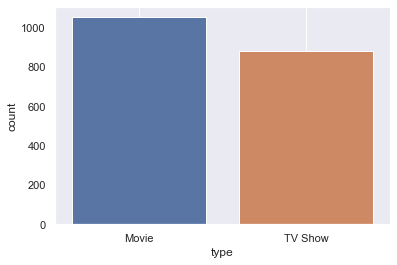

In [10]:
sns.set(style='darkgrid')
sns.countplot(df.type.loc[df.release_year>=2018])
plt.grid()

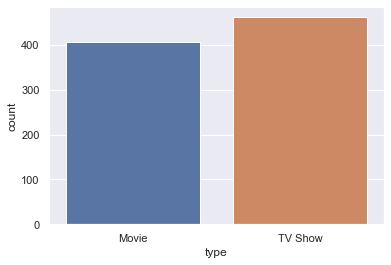

In [11]:
sns.countplot(df.type.loc[df.release_year>=2019])

###### One can infer from this that the rate at which TV shows are being released is increasing. This can be confirmed by a distribution plot as well.

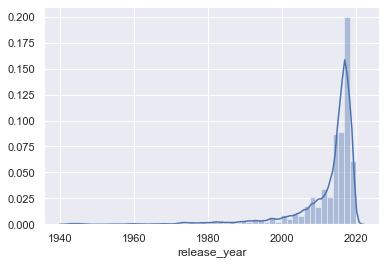

In [12]:
sns.distplot(df.release_year.loc[df.type=='Movie']) # distribution plot for type movie.

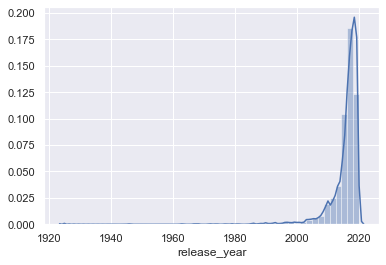

In [13]:
sns.distplot(df.release_year.loc[df.type=='TV Show'])#distribution plot for type TV Show

###### Next, we will observe the actual count distribution of the rating among the movies/shows.

Text(0.5, 1.0, 'Distribution of movie/show ratings.')

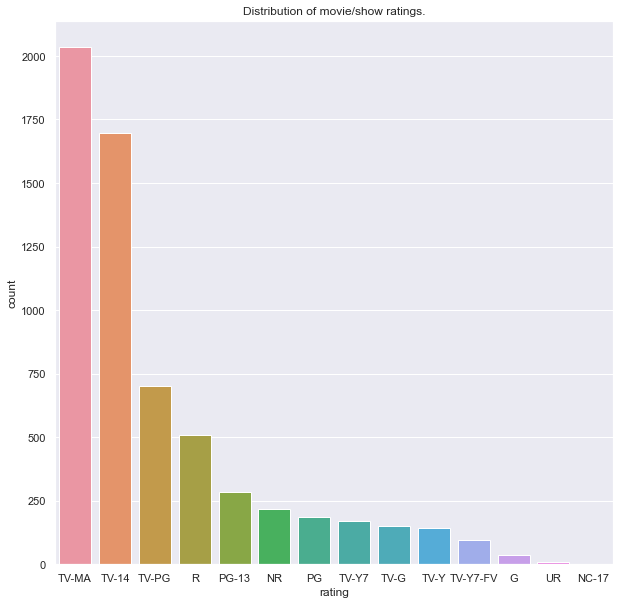

In [14]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.countplot(df.rating, order = df.rating.value_counts().index[0:15])
plt.title('Distribution of movie/show ratings.')

###### We can see that most of the shows/movies are rated 'TV-MA' which means it is for mature audience only and may be viewed by kids under the age of 17 under parental supervision.

Text(0.5, 1.0, 'Comparison of ratings for the TV Shows and Movies.')

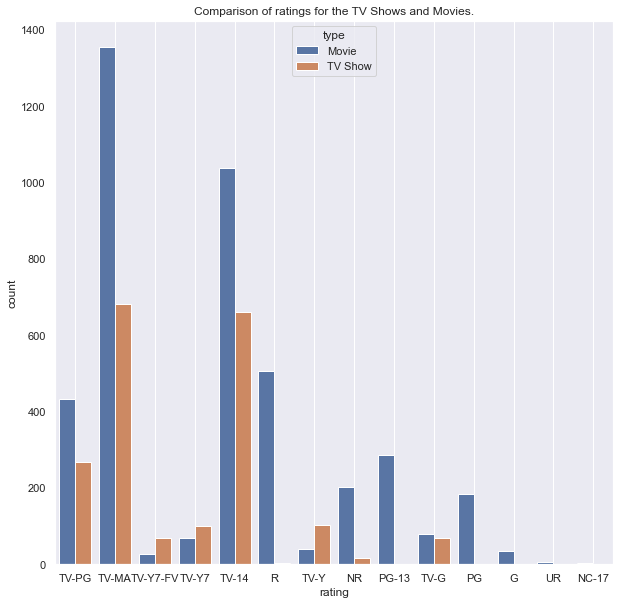

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(df.rating,hue=df.type)
plt.grid()
plt.title('Comparison of ratings for the TV Shows and Movies.')

###### Above graph displays the comparison between the number of movies and shows for a given particular particular rating.

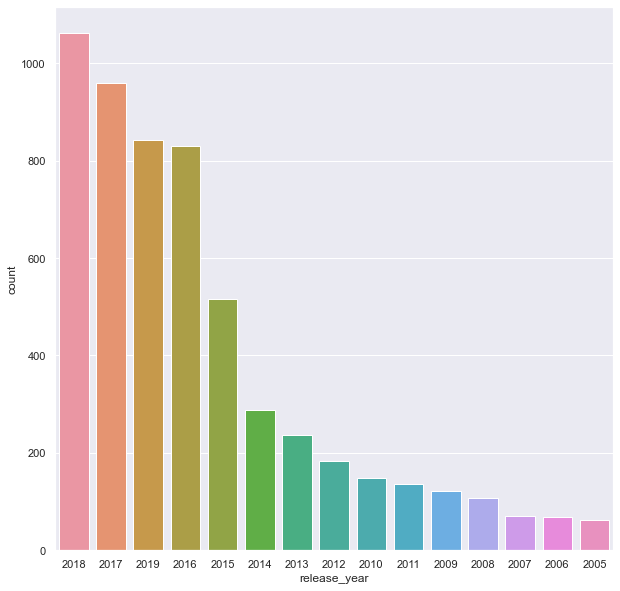

In [16]:
# Next, we will compare the number of movies/shows being released each year.
plt.figure(figsize=(10,10))
sns.countplot(df.release_year, order=df.release_year.value_counts().index[0:15])

###### This confirms our prediction that most of the movies/shows have been released in the years 2018-2020.

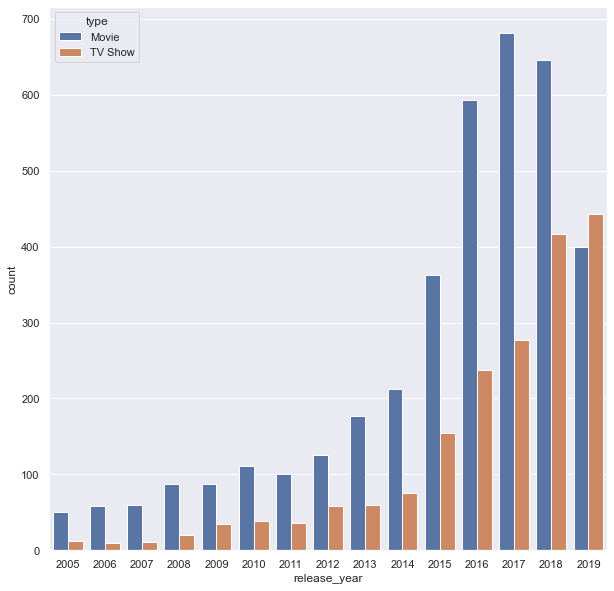

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(df.release_year,hue=df.type,order=sorted(df.release_year.value_counts().index[0:15]))

###### The above graph helps us directly compare the number of TV shows and movies released each year, in order.

In [34]:
df['cast'].value_counts()

                                                                                                                                                           570
David Attenborough                                                                                                                                          18
Samuel West                                                                                                                                                 10
Jeff Dunham                                                                                                                                                  7
Craig Sechler                                                                                                                                                6
                                                                                                                                                          ... 
David Cross, Bob Odenkirk, John Ennis, Jay Joh

###### David Attenborough has hence done the most number of movies/shows since the inception of Netflix.

---
### Next, we will define a function that print movies similar to the ones which the user likes, using NLP.
---

In [18]:
# we will replace the missing values of the categorical data with the mode of that particular dataset
df['release_year'] = df['release_year'].fillna(2018)
# above commands may also be used for the columns "director" and "cast", but that is completely up to the user


# we define two functions, one of which returns the index of the movie input and another, which does opposite of the same
def find_index(movie):
    index = df.loc[df['title']==movie].index.values[0]
    return index

def find_movie(index):
    movie = df['title'].loc[df.index==index].values[0]
    return movie


# we declare an empty dataframe and concatenate it to the original dataframe, which will later be filled with
# merged values from every column of the corresponding row.


df_merged = pd.DataFrame({'Merged':[]})
df = pd.concat([df,df_merged],axis=1)
df = df.fillna(" ") # to support the count vecotrizer
df1 = df[['type','cast','country','description','Merged']]
for i in range(0,6234):
    df1.iloc[i,4] = df1.iloc[i,0]+" "+ df1.iloc[i,1]+" "+ df1.iloc[i,2] + " " + df1.iloc[i,3]

# we shall now bring in the use of the modules that we imported earlier
count_matrix = cv.fit_transform(df1['Merged'])
cosine_sim = cosine_similarity(count_matrix)
    

# Finally we, define the main function which will return a list of movies similar to the ones which the user likes.
# We make use of the functions we defined earlier to find index of a given movie and vice versa.
# This makes use of basic NLP.



def find_similar_movies(users_favorite_movie):    
    
    movie_index = find_index(users_favorite_movie)
    similar_shows = list(enumerate(cosine_sim[movie_index]))
    sorted_similar_shows = sorted(similar_shows, reverse=True, key= lambda x:x[1])[1:]
    i = 0 
    print(f'Top 5 movies/shows similar to "{users_favorite_movie}" based on the description and type:\n')
    print('--------------------------------------------------------------------------------------------')
    for movie in sorted_similar_shows:
        print(f'{i+1}. {find_movie(movie[0])}')
        i+=1
        if i>4:
            break
    print('--------------------------------------------------------------------------------------------')

C:\Users\Yashwardhan Banta\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-18-6ce49f22b4e2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[i,4] = df1.iloc[i,0]+" "+ df1.iloc[i,1]+" "+ df1.iloc[i,2] + " " + df1.iloc[i,3]


---
###### Note - The user should run the above block of code not more than once. They may even restart the kernel and run all cells again should the need arise.

### The user may call the function 'find_similar_movies' by providing the argument as the name of his/her favorite movie. An example of the same may be seen below.
---

In [21]:
find_similar_movies('Norm of the North: Keys to the Kingdom')

Top 5 movies/shows similar to "Norm of the North: Keys to the Kingdom" based on the description and type:

--------------------------------------------------------------------------------------------
1. Norm of the North: King Sized Adventure
2. Long Shot
3. Spookley the Square Pumpkin
4. My Own Man
5. The Babysitter
--------------------------------------------------------------------------------------------
